# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Group EDA
Week 8 | Day 3

## Congratulations! 🎉

You have just completed your final weekly project!

We're going to be moving into time series and big data in the weeks to follow, but for the rest of 
the week, we're going take a break and consolidate the skills you have learned so far on a project of your choosing...

## Today we will be splitting into 4 groups to perform an end-to-end analysis of a dataset
#### This analysis will take place over the next two days and culminate in a presentation tomorrow afternoon

#### Your group will be responsible for the following:

- Choosing a dataset to explore
- Defining a problem statement as a group
- Exloring your data and practicing exploratory analysis 
- Validating results
- Communicating results succinctly

## Deliverables

- 5-10 minute presentation 
- Jupyter notebook of your analysis

## Peer Feedback

After each team's presentation, the other teams will be asked to provide peer feedback
- This should include at least one thing the team did well and one thing they could have improved
- Please focus on both the analysis and the presentation style

You will also be prompted to provide feedback on other team member's on a Google form

## Suggestions

- Appoint someone to present / organize
- Look at summary statistics, explore data
- Refine problem statement
- Divide and conquer your workload
- Don't fight - you will be held accountable for presenting _something_.
- You will present

## The Datasets

#### You many use any dataset you like, here are a few places to get you started:
- https://github.com/caesar0301/awesome-public-datasets
- https://github.com/fivethirtyeight/data

### You have one hour to choose a dataset, if you fail to choose one, you will randomly be assigned one


## Good luck!

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [122]:
df = pd.read_csv('vgsales.csv')

In [123]:
df = df[df['Year'].notnull()]
df['Year'] = df['Year'].astype(int)
df['Year'] = pd.to_datetime(df['Year'], format='%Y').dt.year

In [130]:
def platform_bin(platform):
    return_value=""
    if platform == "DS":
        return_value="Nintendo"
    if platform == "PS3":
        return_value="Sony"
    if platform == "Wii":
        return_value="Nintendo"
    if platform == "X360":
        return_value="Microsoft"
    if platform == "PSP":
        return_value="Sony"
    if platform == "PC":
        return_value="PC"
    if platform == "PS2":
        return_value="Sony"
    if platform == "3DS":
        return_value="Nintendo"
    if platform == "PSV":
        return_value="Sony"
    if platform == "PS4":
        return_value="Sony"
    if platform == "XOne":
        return_value="Microsoft"
    if platform == "WiiU":
        return_value="Nintendo"
    if platform == "GBA":
        return_value="Nintendo"
    if platform == "XB":
        return_value="Microsoft"
    if platform == "GC":
        return_value="Nintendo"
    if platform == "DC":
        return_value="Sega"
    if platform == "PC":
        return_value="PC"
    return return_value

def handheld_bin(platform):
    return_value=""
    if platform == "DS":
        return_value="Yes"
    if platform == "PS3":
        return_value="No"
    if platform == "Wii":
        return_value="No"
    if platform == "X360":
        return_value="No"
    if platform == "PSP":
        return_value="Yes"
    if platform == "PC":
        return_value="No"
    if platform == "PS2":
        return_value="No"
    if platform == "3DS":
        return_value="Yes"
    if platform == "PSV":
        return_value="Yes"
    if platform == "PS4":
        return_value="No"
    if platform == "XOne":
        return_value="No"
    if platform == "WiiU":
        return_value="Yes"
    if platform == "GBA":
        return_value="Yes"
    if platform == "XB":
        return_value="No"
    if platform == "GC":
        return_value="No"
    if platform == "DC":
        return_value="No"
    return return_value

In [132]:
df["Handheld"]=df["Platform"].apply(lambda x: handheld_bin(x))
df["Platform_CO"]=df["Platform"].apply(lambda x: platform_bin(x))
df = df[(df['Year']<2016) & (df['Year']>=2005) & (df['Platform_CO'] != 'Sega')]
df['Platform'].value_counts()
#df[df['Year']>=2005]['Platform'].value_counts()
total = df['Global_Sales']
df['tot_global_sales'] = total
df = df[(df['tot_global_sales']>=.15) & (df['Genre']!='Puzzle')]

In [133]:
df = df.loc[lambda df: df.Global_Sales > 0.15, :]


In [134]:
df['Platform'].unique()

array(['Wii', 'DS', 'X360', 'PS3', '3DS', 'PS4', 'PC', 'PSP', 'XOne',
       'WiiU', 'PS2', 'PSV', 'GBA', 'XB', 'GC'], dtype=object)

In [135]:
result = df.groupby(['Name', 'Genre', 'Year'])['Global_Sales'].sum().to_frame()
result = result.reset_index()
result = result.groupby(['Genre', 'Year'])['Global_Sales'].agg({sum,len})
result.reset_index(inplace = True)
result['avg'] = result['sum'] / result['len']

In [136]:
range(2005, 2016)

[2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]

In [137]:
t5_15 = result.loc[lambda result: result.Year > 2005, :]
t5_15 = t5_15.loc[lambda t5_15: t5_15.Year < 2016, :]

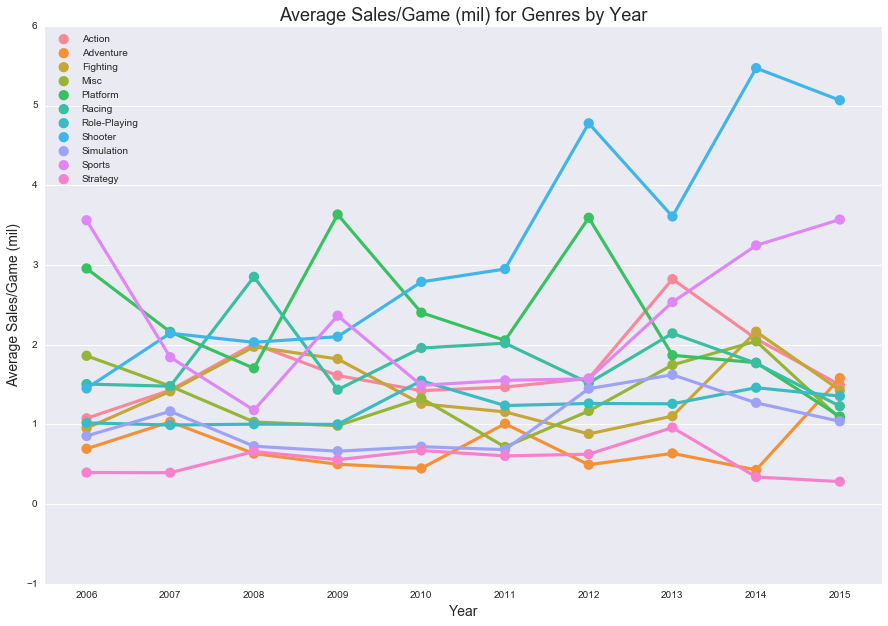

In [138]:
plt.subplots(figsize =(15,10))
sns.pointplot(data = t5_15,x='Year',y='avg',hue='Genre',)
plt.title("Average Sales/Game (mil) for Genres by Year",fontsize = 18)
plt.xlabel("Year",fontsize = 14)
plt.ylabel("Average Sales/Game (mil)",fontsize = 14)
plt.legend( loc = 'upper left')

In [139]:
df[df['Genre'] == 'Platform']

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Handheld,Platform_CO,tot_global_sales
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,Yes,Nintendo,30.01
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,No,Nintendo,28.62
48,49,Super Mario Galaxy,Wii,2007,Platform,Nintendo,6.16,3.40,1.20,0.76,11.52,No,Nintendo,11.52
53,54,Super Mario 3D Land,3DS,2011,Platform,Nintendo,4.89,2.99,2.13,0.78,10.79,Yes,Nintendo,10.79
64,65,New Super Mario Bros. 2,3DS,2012,Platform,Nintendo,3.66,3.07,2.47,0.63,9.82,Yes,Nintendo,9.82
91,92,Super Mario Galaxy 2,Wii,2010,Platform,Nintendo,3.66,2.42,0.98,0.64,7.69,No,Nintendo,7.69
125,126,Donkey Kong Country Returns,Wii,2010,Platform,Nintendo,3.25,1.84,1.03,0.47,6.59,No,Nintendo,6.59
148,149,LittleBigPlanet,PS3,2008,Platform,Sony Computer Entertainment,2.80,2.05,0.17,0.90,5.92,No,Sony,5.92
183,184,New Super Mario Bros. U,WiiU,2012,Platform,Nintendo,2.32,1.30,1.27,0.31,5.19,Yes,Nintendo,5.19
261,262,Super Mario 3D World,WiiU,2013,Platform,Nintendo,2.11,1.11,0.72,0.30,4.25,Yes,Nintendo,4.25
